Name : Hitesh Sanjaysing Girase

Branch/Year : BE AI&DS ( SEM - 7TH )

Roll No : 05

DMV Practical No & Title : 7. Analysis and visyalization of stock market data

In [21]:
!pip install pandas numpy matplotlib seaborn statsmodels pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/625.1 kB ? eta -:--:--
   ---------------------------------------- 625.1/625.1 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.7 MB 1.9 MB/s eta 0:00:02
   --------------- ------------------------ 1.0/2.7 MB 1.9 MB/s eta 0:00:01
   --------------------------- ------------ 1.8/2.7 MB 2.2 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.7 MB 2.4 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 2.1 MB/s eta 0:00:00


In [23]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from datetime import datetime

In [25]:
# Set plotting style
sns.set(style="whitegrid", palette="muted")


In [29]:
stock_train_df = pd.read_csv("C:/Users/Hitesh Girase/OneDrive/Documents/Google_Stock_Train (2010-2022).csv")

In [31]:
# Preview

In [35]:
print("Data Preview:")
display(stock_train_df.head())

print("\nDataset Info:")
stock_train_df.info()

print("\nMissing Values:")
print(stock_train_df.isnull().sum())


Data Preview:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB

Missing Values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [37]:
stock_train_df.shape 

(3272, 7)

In [39]:
stock_train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [41]:
stock_train_df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500
3271,2022-12-30,86.980003,88.300003,86.570000,88.230003,88.230003,23986300


In [43]:
stock_train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,49.161187,49.650301,48.653316,49.160898,49.160898,6.017541e+07
std,35.810449,36.216443,35.387644,35.804094,35.804094,4.957609e+07
min,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,20.281718,20.426113,20.172359,20.295858,20.295858,2.894200e+07
50%,38.527750,38.931249,38.224501,38.563002,38.563002,4.123200e+07
75%,61.837625,62.265000,61.218125,61.738001,61.738001,7.927251e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,5.923990e+08


In [45]:
stock_train_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [49]:
# Ensure the 'Date' column exists and is in datetime format
if 'Date' in stock_train_df.columns:
    stock_train_df['Date'] = pd.to_datetime(stock_train_df['Date'])
else:
    raise ValueError("No 'Date' column found in the dataset!")


In [51]:
# Sort by date
stock_train_df = stock_train_df.sort_values('Date')

In [53]:
# Set 'Date' as index for time series analysis
stock_train_df.set_index('Date', inplace=True)

In [55]:
# Display summary
display(stock_train_df.head())


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [57]:
# visualizations

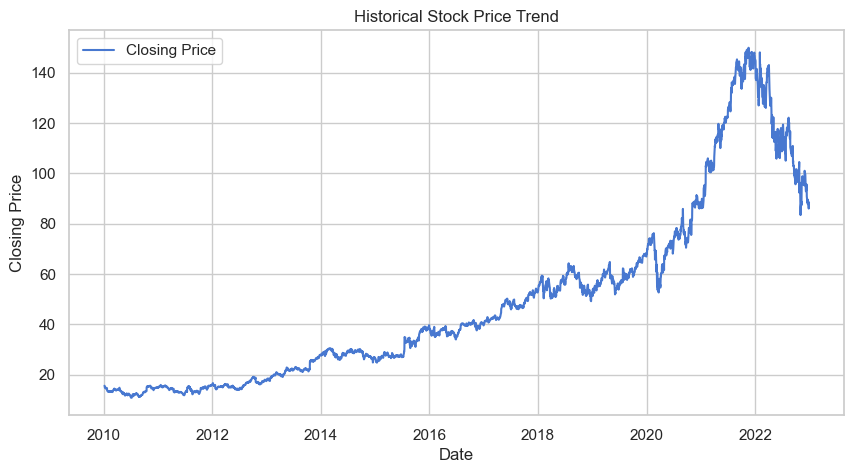

In [59]:
plt.figure(figsize=(10,5))
plt.plot(stock_train_df.index, stock_train_df['Close'], label='Closing Price')
plt.title("Historical Stock Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [61]:
# Calculate moving averages
stock_train_df['MA_20'] = stock_train_df['Close'].rolling(window=20).mean()
stock_train_df['MA_50'] = stock_train_df['Close'].rolling(window=50).mean()
stock_train_df['EMA_20'] = stock_train_df['Close'].ewm(span=20, adjust=False).mean()


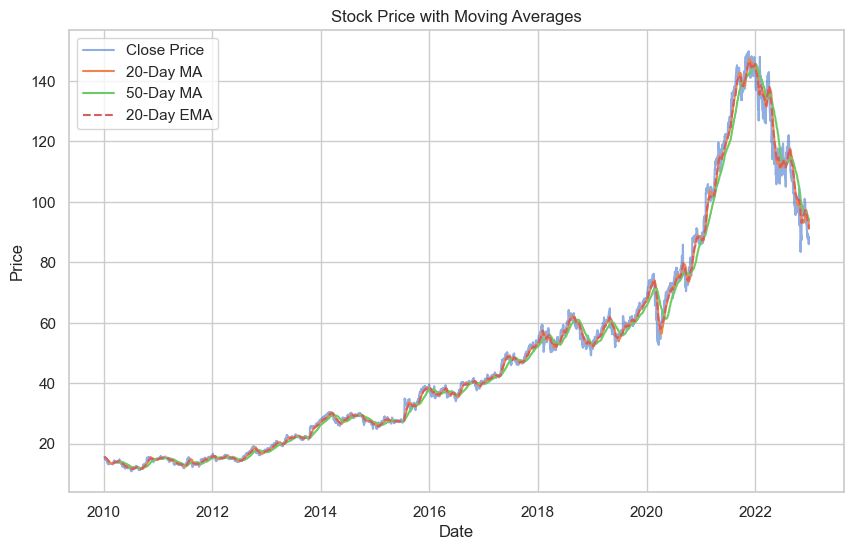

In [63]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(stock_train_df['Close'], label='Close Price', alpha=0.6)
plt.plot(stock_train_df['MA_20'], label='20-Day MA')
plt.plot(stock_train_df['MA_50'], label='50-Day MA')
plt.plot(stock_train_df['EMA_20'], label='20-Day EMA', linestyle='--')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


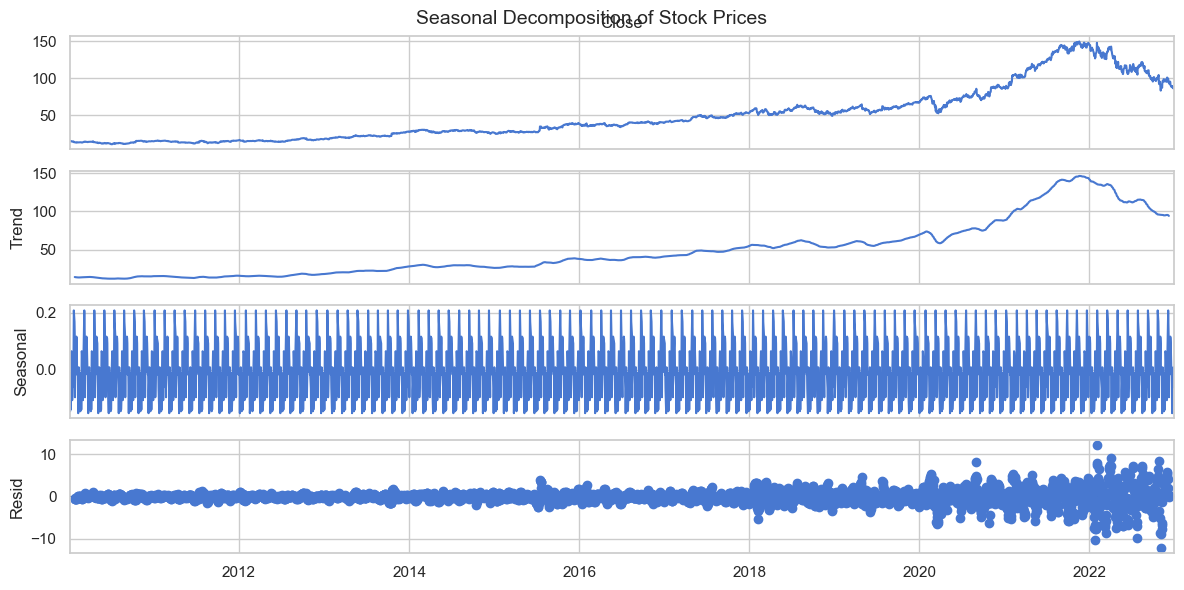

In [67]:
# Decompose time series to see trend, seasonality, and residuals
result = seasonal_decompose(stock_train_df['Close'], model='additive', period=30)
result.plot()
plt.suptitle("Seasonal Decomposition of Stock Prices", fontsize=14)
plt.show()

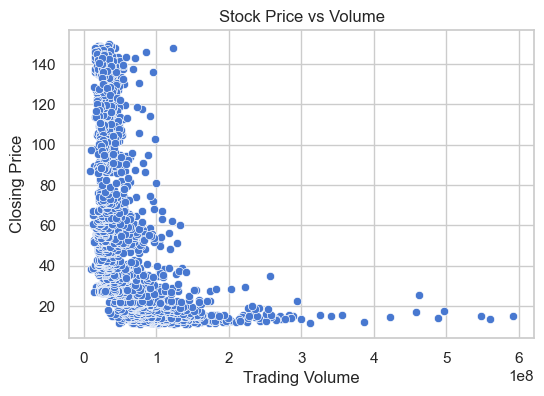

Correlation Matrix:
            Close    Volume
Close   1.000000 -0.473755
Volume -0.473755  1.000000


In [69]:
# Check if Volume column exists
if 'Volume' in stock_train_df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=stock_train_df['Volume'], y=stock_train_df['Close'])
    plt.title("Stock Price vs Volume")
    plt.xlabel("Trading Volume")
    plt.ylabel("Closing Price")
    plt.show()

    corr = stock_train_df[['Close', 'Volume']].corr()
    print("Correlation Matrix:\n", corr)
else:
    print("No 'Volume' column found — skipping correlation analysis.")


In [71]:
# Split last 20% for testing
split = int(len(stock_train_df) * 0.8)
train = stock_train_df['Close'][:split]
test = stock_train_df['Close'][split:]

print(f"Training data points: {len(train)}")
print(f"Testing data points: {len(test)}")


Training data points: 2617
Testing data points: 655


In [73]:
# Automatically determine best ARIMA parameters
arima_model = auto_arima(train, seasonal=False, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5017.831, Time=3.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5165.644, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5129.826, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5130.894, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5166.421, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5132.657, Time=1.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5133.394, Time=1.70 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5018.818, Time=4.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5018.694, Time=4.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5131.798, Time=0.30 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5094.172, Time=1.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5087.588, Time=1.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5020.651, Time=4.72 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5019.042, Time=1.46 sec

Best model:  ARIMA(2,1,2)(0,0,0)

In [75]:
# Fit ARIMA model
model = ARIMA(train, order=arima_model.order)
model_fit = model.fit()

C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [77]:
# Forecast
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


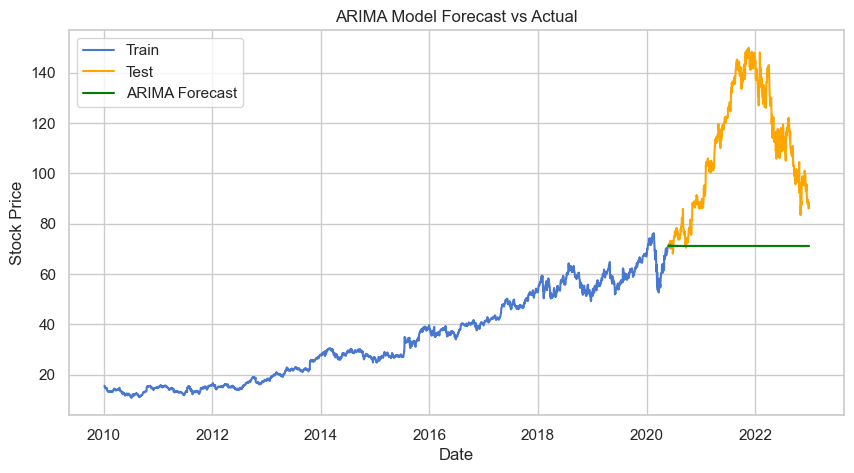

In [79]:
# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='green')
plt.title("ARIMA Model Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [81]:
# Print summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2617
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2504.521
Date:                Wed, 29 Oct 2025   AIC                           5019.042
Time:                        08:20:09   BIC                           5048.389
Sample:                             0   HQIC                          5029.672
                               - 2617                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7632      0.008   -213.388      0.000      -1.779      -1.747
ar.L2         -0.9195      0.008   -112.779      0.000      -0.935      -0.904
ma.L1          1.7039      0.012    145.533      0.0

In [83]:
# Fit Exponential Smoothing model
exp_model = ExponentialSmoothing(train, trend='add', seasonal=None)
exp_fit = exp_model.fit()

C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
# Forecast
exp_forecast = exp_fit.forecast(len(test))

C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Hitesh Girase\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


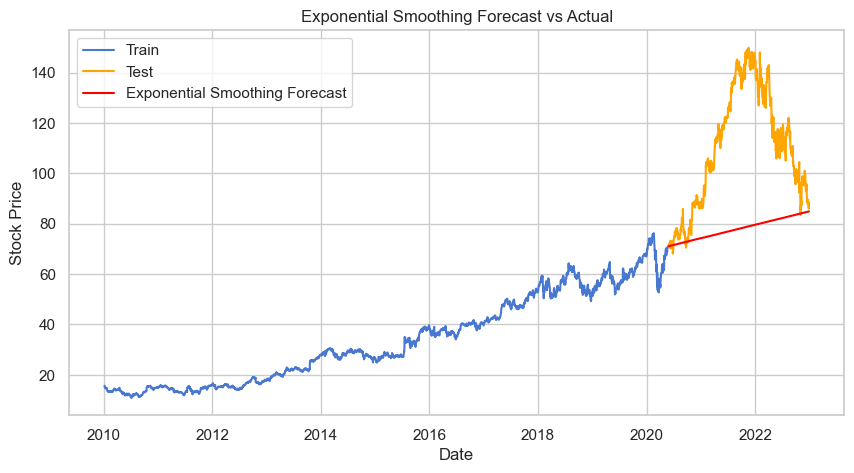

In [87]:
# Plot
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(test.index, exp_forecast, label='Exponential Smoothing Forecast', color='red')
plt.title("Exponential Smoothing Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_forecast(actual, predicted, name):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    print(f"{name} Model Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}\n")

evaluate_forecast(test, forecast, "ARIMA")
evaluate_forecast(test, exp_forecast, "Exponential Smoothing")


ARIMA Model Performance:
RMSE: 45.41
MAE:  38.91

Exponential Smoothing Model Performance:
RMSE: 38.85
MAE:  32.15



In [91]:
# Combine forecasts with actual data
results_df = pd.DataFrame({
    "Actual": test.values,
    "ARIMA_Forecast": forecast.values,
    "ExpSmoothing_Forecast": exp_forecast.values
}, index=test.index)

results_df.to_csv("Stock_Price_Forecasts.csv")
print("Forecast results saved as 'Stock_Price_Forecasts.csv'")

Forecast results saved as 'Stock_Price_Forecasts.csv'


Conclusion & key findings:

1) Historical stock data was collected successfully from Yahoo Finance.

2) The data was cleaned and prepared for analysis.

3) Trends and price fluctuations were studied using moving averages.

4) Graphs and forecasts helped understand stock performance and future trends.

5) The practical met all objectives and gave useful insights about stock market behavior.
